In [89]:
import networkx
from collections import Counter
import matplotlib.pyplot as plt
import math

In [90]:
Graph_2 = networkx.DiGraph()
fp = open(r'Wiki-Vote.txt', 'r')
text = fp.read()
list_lines = text.split('\n')
del list_lines[0:4]

list_edges = []
for a in list_lines:
    b = a.split()
    edge_nodes = (b[0], b[1])
    list_edges.append(edge_nodes)

Graph_2.add_edges_from(list_edges)

## Finding the pagerank values of all nodes of the graph

In [91]:
dict_page_ranks = networkx.pagerank(Graph_2)
print("The dictionary page rank values with node ids as key and page rank value as the value is printed below:\n")
print(dict_page_ranks)

The dictionary page rank values with node ids as key and page rank value as the value is printed below:

{'30': 0.00017349553934328362, '1412': 0.0008141761230496596, '3352': 0.0017851250122027215, '5254': 0.0021500675059293235, '5543': 0.0010508052619841281, '7478': 0.0008124303526134783, '3': 0.00020539498232448027, '28': 0.0016986730322136937, '39': 0.0003439790689580258, '54': 0.0003476546497189804, '108': 0.00043983711534545167, '152': 0.0005817197428805893, '178': 0.0002975848833195019, '182': 0.00016083873728146711, '214': 0.001659919966936546, '271': 0.001334924091441659, '286': 0.00017367757770305088, '300': 0.00015065607046072738, '348': 0.00017393564565284633, '349': 9.460415271381965e-05, '371': 0.00028929033923574956, '567': 0.0003315269129516528, '581': 0.00010905154270480285, '584': 0.00022615441013923315, '586': 0.0001051882501948107, '590': 0.0001945807586420494, '604': 0.00018151640169193395, '611': 0.00021640905598463537, '8283': 0.00032879238326170694, '25': 5.04878

## Finding the hub and authority score of each of the nodes of the graph

In [92]:
dict_hub_scores, dict_auth_scores = networkx.hits(Graph_2)

In [93]:
print("The dictionary of hub scores with node ids as key and Hub score as the value is printed below:\n")
print(dict_hub_scores)

The dictionary of hub scores with node ids as key and Hub score as the value is printed below:

{'30': 7.925509536499254e-05, '1412': 0.0, '3352': 0.0033814231063793564, '5254': 0.0003772096308658232, '5543': 0.0013969722536770427, '7478': 0.0, '3': 4.021031640108498e-05, '28': 0.0003569336095454782, '39': 0.00010662223574717072, '54': 2.526962060030596e-05, '108': 2.5889831779624102e-06, '152': 5.9915578524252184e-05, '178': 0.00043648719294162307, '182': 0.0006660507491761451, '214': 0.0, '271': 0.0, '286': 0.0, '300': 0.0, '348': 9.31314824540088e-05, '349': 1.0425226313768522e-06, '371': 0.0009447618733172561, '567': 1.6904022456774042e-06, '581': 0.0, '584': 8.003211011666256e-06, '586': 6.262609343580734e-05, '590': 3.9759256361478544e-05, '604': 2.395521646244623e-05, '611': 0.0, '8283': 0.0, '25': 0.00021311562591464213, '6': 0.0010539872862349862, '8': 0.00032001233333516443, '19': 7.217473720787984e-05, '23': 0.00018134382080879202, '29': 0.0006751699797254746, '33': 6.990816

In [94]:
print("The dictionary of Authority scores with node ids as key and Authority score as the value is printed below:\n")
print(dict_auth_scores)

The dictionary of Authority scores with node ids as key and Authority score as the value is printed below:

{'30': 9.508954836855905e-05, '1412': 0.00012172939865316845, '3352': 0.002328415091537902, '5254': 0.0018247396642980143, '5543': 0.0012852668946906865, '7478': 0.0007626588344311034, '3': 9.501171859429164e-05, '28': 0.00025475061392999266, '39': 6.132950504129257e-05, '54': 0.0001402071358783933, '108': 4.840902380638934e-06, '152': 0.00012871399188050248, '178': 0.00012808339451971898, '182': 9.346016586924055e-05, '214': 0.0008251269692542302, '271': 0.0007442312256425673, '286': 8.219949442141481e-05, '300': 3.7566410597961e-05, '348': 0.0001130412019360965, '349': 2.9996853211474293e-05, '371': 7.97327877134329e-05, '567': 7.27392478142962e-05, '581': 2.3189352659430044e-05, '584': 5.5124056215974675e-05, '586': 2.7879633458043387e-05, '590': 8.786023670808162e-05, '604': 2.7141024152978293e-05, '611': 8.750109691892437e-05, '8283': 8.09219316321633e-06, '25': 0.0, '6': 6.

## Now plotting the different graphs to do analysis

In [95]:
list_tuples_indegree = Graph_2.in_degree()
list_tuples_outdegree = Graph_2.out_degree()
dict_outdegree = {}
for f in list_tuples_outdegree:
    dict_outdegree[f[0]] = f[1]
list_indegrees, list_outdegrees, list_hub_scores, list_auth_scores, list_pr_scores = [], [], [], [], []
list_pairs_hub, list_pairs_auth, list_pairs_pr = [], [], []
for t in list_tuples_indegree:
    curr_node = t[0]
    list_indegrees.append(t[1])
    list_outdegrees.append(dict_outdegree[curr_node])
    list_hub_scores.append(dict_hub_scores[curr_node])
    list_auth_scores.append(dict_auth_scores[curr_node])
    list_pr_scores.append(dict_page_ranks[curr_node])
    list_pairs_hub.append([curr_node, dict_hub_scores[curr_node]])
    list_pairs_auth.append([curr_node, dict_auth_scores[curr_node]])
    list_pairs_pr.append([curr_node, dict_page_ranks[curr_node]])

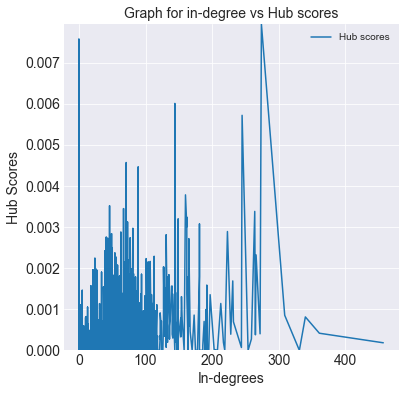

In [96]:
#Plotting for indegree
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))
zip_cord = zip(list_indegrees, list_hub_scores)
list_zip_cord = list(zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]
plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord)) 
plt.plot(list_x_cord, list_y_cord, label = 'Hub scores')
plt.xlabel('In-degrees', fontsize = 14)
plt.ylabel('Hub Scores', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Graph for in-degree vs Hub scores',fontsize = 14 )
plt.legend()
plt.show()


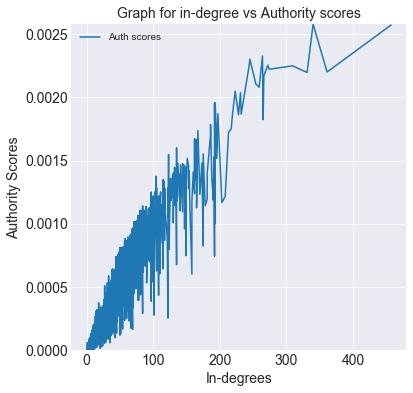

In [97]:
#Plotting for indegree
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))
zip_cord = zip(list_indegrees, list_auth_scores)
list_zip_cord = list(zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]
plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord)) 
plt.plot(list_x_cord, list_y_cord, label = 'Auth scores')
plt.xlabel('In-degrees', fontsize = 14)
plt.ylabel('Authority Scores', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Graph for in-degree vs Authority scores',fontsize = 14 )
plt.legend()
plt.show()

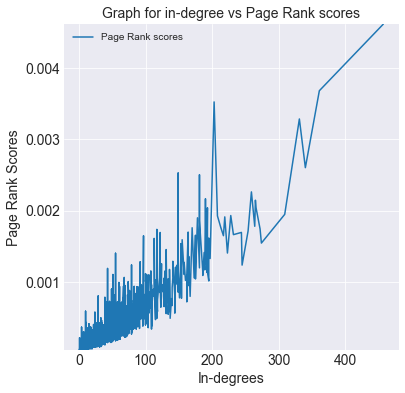

In [98]:
#Plotting for indegree
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))
zip_cord = zip(list_indegrees, list_pr_scores)
list_zip_cord = list(zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]
plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord)) 
plt.plot(list_x_cord, list_y_cord, label = 'Page Rank scores')
plt.xlabel('In-degrees', fontsize = 14)
plt.ylabel('Page Rank Scores', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Graph for in-degree vs Page Rank scores',fontsize = 14 )
plt.legend()
plt.show()

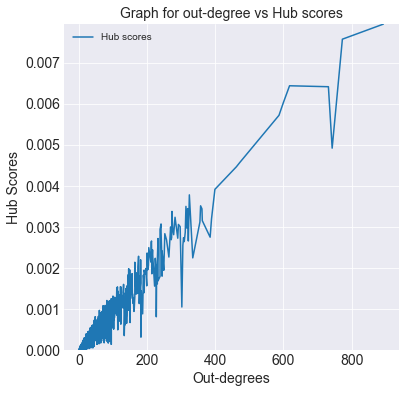

In [99]:
#Plotting for outdegree
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))
zip_cord = zip(list_outdegrees, list_hub_scores)
list_zip_cord = list(zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]
plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord)) 
plt.plot(list_x_cord, list_y_cord, label = 'Hub scores')
plt.xlabel('Out-degrees', fontsize = 14)
plt.ylabel('Hub Scores', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Graph for out-degree vs Hub scores',fontsize = 14 )
plt.legend()
plt.show()

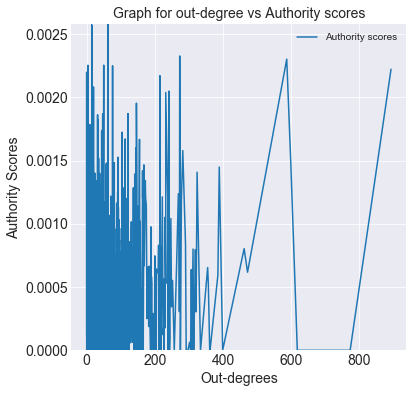

In [100]:
#Plotting for outdegree
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))
zip_cord = zip(list_outdegrees, list_auth_scores)
list_zip_cord = list(zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]
plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord)) 
plt.plot(list_x_cord, list_y_cord, label = 'Authority scores')

plt.xlabel('Out-degrees', fontsize = 14)
plt.ylabel('Authority Scores', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Graph for out-degree vs Authority scores',fontsize = 14 )
plt.legend()
plt.show()


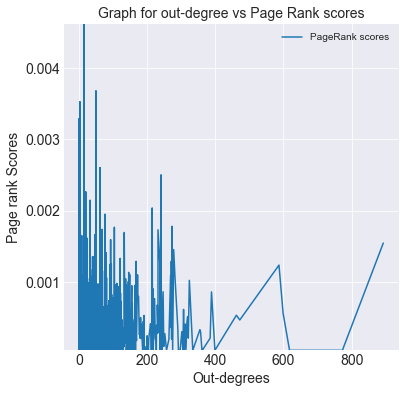

In [101]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))
zip_cord = zip(list_outdegrees, list_pr_scores)
list_zip_cord = list(zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]
plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord)) 
plt.plot(list_x_cord, list_y_cord, label = 'PageRank scores')
plt.xlabel('Out-degrees', fontsize = 14)
plt.ylabel('Page rank Scores', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Graph for out-degree vs Page Rank scores',fontsize = 14 )
plt.legend()
plt.show()

In [102]:
#Making list of top 10 nodes according to Hub score
list_pairs_hub.sort(key = lambda x:x[1], reverse=True)
list_pairs_auth.sort(key = lambda x:x[1], reverse= True)
list_pairs_pr.sort(key = lambda x:x[1], reverse= True)

list_top10_hub = [list_pairs_hub[i][0] for i in range(10)]
list_top10_auth = [list_pairs_auth[j][0] for j in range(10)]
list_top10_pr = [list_pairs_pr[k][0] for k in range(10)]

#For top 10 hubs finding the successors i.e. nodes to which outlinks are there and they are also in Top 10 authorities
print("The top 10 hubs along with top 10 authorites that are also their successors")
for de in range(len(list_top10_hub)):
    d = list_top10_hub[de]
    list_successor = [w for w in Graph_2.successors(d)]
    list_intersection = []
    print(f"\n{de+1}. {d}")
    for e in list_top10_auth:
        if e in list_successor:
            list_intersection.append(e)
    print(list_intersection)



The top 10 hubs along with top 10 authorites that are also their successors

1. 2565
['2398', '4037', '3352', '1549', '762', '3089', '1297', '2625']

2. 766
['2398', '3352', '762', '3089', '2565', '15', '2625']

3. 2688
['2398', '4037', '3352', '1549', '762', '3089', '1297', '2565', '2625']

4. 457
['2398', '4037', '3352', '1549', '762', '3089', '1297', '2565', '15', '2625']

5. 1166
['2398', '4037', '3352', '1549', '762', '3089', '1297', '2565', '15', '2625']

6. 1549
['2398', '4037', '3352', '762', '3089', '1297', '2565', '15', '2625']

7. 11
['3352', '1549', '762', '1297', '2565', '15', '2625']

8. 1151
['2398', '4037', '3352', '1549', '762', '3089', '1297', '15', '2625']

9. 1374
['2398', '4037', '3352', '1549', '762', '3089', '1297', '2565', '2625']

10. 1133
['2398', '4037', '3352', '1549', '762', '3089', '1297', '15', '2625']


In [103]:
#For top 10 Authorities finding the predecessos i.e. nodes from which inlinks are there and they are also in Top 10 Hubs
print("The top 10 Authorities along with top 10 Hubs that are also their predecessors")
for de in range(len(list_top10_auth)):
    d = list_top10_auth[de]
    list_predecessor = [w for w in Graph_2.predecessors(d)]
    list_intersection = []
    print(f"\n{de+1}. {d}")
    for e in list_top10_hub:
        if e in list_predecessor:
            list_intersection.append(e)
    print(list_intersection)

The top 10 Authorities along with top 10 Hubs that are also their predecessors

1. 2398
['2565', '766', '2688', '457', '1166', '1549', '1151', '1374', '1133']

2. 4037
['2565', '2688', '457', '1166', '1549', '1151', '1374', '1133']

3. 3352
['2565', '766', '2688', '457', '1166', '1549', '11', '1151', '1374', '1133']

4. 1549
['2565', '2688', '457', '1166', '11', '1151', '1374', '1133']

5. 762
['2565', '766', '2688', '457', '1166', '1549', '11', '1151', '1374', '1133']

6. 3089
['2565', '766', '2688', '457', '1166', '1549', '1151', '1374', '1133']

7. 1297
['2565', '2688', '457', '1166', '1549', '11', '1151', '1374', '1133']

8. 2565
['766', '2688', '457', '1166', '1549', '11', '1374']

9. 15
['766', '457', '1166', '1549', '11', '1151', '1133']

10. 2625
['2565', '766', '2688', '457', '1166', '1549', '11', '1151', '1374', '1133']


In [104]:
#For top 10 Page rank finding the predecessos i.e. nodes from which inlinks are there and they are also in 
#Top 10 Page Rank Nodes list
print("The top 10 Page Rank nodes along with top 10 Page rank nodes that are also their predecessors")
for de in range(len(list_top10_pr)):
    d = list_top10_pr[de]
    list_predecessor = [w for w in Graph_2.predecessors(d)]
    list_intersection = []
    print(f"\n{de+1}. {d}")
    for e in list_top10_pr:
        if e in list_predecessor:
            list_intersection.append(e)
    print(list_intersection)

The top 10 Page Rank nodes along with top 10 Page rank nodes that are also their predecessors

1. 4037
['15']

2. 15
['4037', '2237']

3. 6634
[]

4. 2625
['2398']

5. 2398
['15', '2237', '4191', '5254']

6. 2470
['2237']

7. 2237
[]

8. 4191
['2398', '2237', '5254']

9. 7553
[]

10. 5254
[]


In [105]:
print("The top 10 nodes according to the hub score along with their hub score are:\n")
print("  Node id     Hub score")
for y in range(10):
    print(f"{y+1}.)  {list_pairs_hub[y][0]}     {list_pairs_hub[y][1]}")

The top 10 nodes according to the hub score along with their hub score are:

  Node id     Hub score
1.)  2565     0.00794049270807403
2.)  766     0.007574335297444512
3.)  2688     0.006440248991012525
4.)  457     0.00641687049019565
5.)  1166     0.006010567902433343
6.)  1549     0.0057207540583986485
7.)  11     0.004921182064008282
8.)  1151     0.004572040701802756
9.)  1374     0.004467888792672376
10.)  1133     0.003918881732047633


In [106]:
print("The top 10 nodes according to the Authority score along with their Authority score are:\n")
print("  Node id     Authority score")
for y in range(10):
    print(f"{y+1}.)  {list_pairs_auth[y][0]}     {list_pairs_auth[y][1]}")

The top 10 nodes according to the Authority score along with their Authority score are:

  Node id     Authority score
1.)  2398     0.002580147178008918
2.)  4037     0.002573241124142803
3.)  3352     0.002328415091537902
4.)  1549     0.0023037314804751075
5.)  762     0.00225587485637424
6.)  3089     0.0022534066884266454
7.)  1297     0.00225014463679536
8.)  2565     0.002223564103945871
9.)  15     0.002201543492543811
10.)  2625     0.0021978968035237852


In [107]:
print("The top 10 nodes according to the PageRank score along with their PageRank score are:\n")
print("  Node id     PageRank score")
for y in range(10):
    print(f"{y+1}.)  {list_pairs_pr[y][0]}     {list_pairs_pr[y][1]}")

The top 10 nodes according to the PageRank score along with their PageRank score are:

  Node id     PageRank score
1.)  4037     0.0046127158911675485
2.)  15     0.0036812207295292792
3.)  6634     0.003524813657640259
4.)  2625     0.0032863743692309023
5.)  2398     0.0026053331717250192
6.)  2470     0.0025301053283849546
7.)  2237     0.002504703800483994
8.)  4191     0.0022662633042363454
9.)  7553     0.002170185049195958
10.)  5254     0.0021500675059293235
